In [1]:
from load_results import load_result_dataset
import pandas as pd
import numpy as np
pn1 = 'full_fine_tuning_50epochs_edge_paper_final2'
pn2 = 'full_fine_tuning_50epochs_paper_final2'
pn3 = 'none' #'full_fine_tuning_50epochs_budget'

final_data = load_result_dataset(pn1, pn2, pn3)
final_data = [{**d, 'ft_strategy': 'FFT (50 epochs)'} for d in final_data]

../results/none/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion_aesthetic-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/CLIP-convnext_base_w-laion2B-s13B-b82K_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/deit_small_patch16_224.fb_in1k_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/robust_resnet50_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50epochs_paper_final2/robust_resnet50_uc-merced-land-use-dataset_TRADES_v2.pkl
../results/none/vit_small_patch16_224.augreg_in21k_uc-merced-land-use-dataset_TRADES_v2.pkl
HEY
../results/full_fine_tuning_50

In [3]:
from process_database import process_grouped_df, process_rankings
grouped_df = process_grouped_df(final_data,   )
grouped_df = process_rankings(grouped_df)
analysis = grouped_df[ ('TOTAL', )].reset_index()

# Filter for large architectures
# large_models = analysis[ (analysis['model_size'] == 'medium') & (analysis['pre_training_strategy'] == 'supervised (robust)') ]
# medium1 = large_models['borda'].mean()
# large_models = analysis[ (analysis['model_size'] == 'large') & (analysis['pre_training_strategy'] == 'supervised (robust)') ]
# large1 = large_models['borda'].mean()
# rate_a = (large1 - medium1) / medium1
# rate_b = (large1 - medium1) / ((large1 + medium1) / 2)
# print(rate_a, rate_b)


# large_models = analysis[ (analysis['model_size'] == 'medium') & (analysis['pre_training_strategy'] == 'supervised (multistep)') ]
# medium2 = large_models['borda'].mean()
# large_models = analysis[ (analysis['model_size'] == 'large') & (analysis['pre_training_strategy'] == 'supervised (multistep)') ]
# large2 = large_models['borda'].mean()
# rate_a = (large2 - medium2) / medium2
# rate_b = (large2 - medium2) / ((large2 + medium2) / 2)
# print(rate_a, rate_b)

# large_models = grouped_df[ (grouped_df['model_size'] == 'medium') & (grouped_df['pre_training_strategy'] == 'supervised (multistep)') ]
# mean_score_large = large_models['borda'].mean()
# print(mean_score_large)

# large_models = grouped_df[ (grouped_df['model_size'] == 'medium') & (grouped_df['pre_training_strategy'] == 'supervised') ]
# mean_score_large = large_models['borda'].mean()
# print(mean_score_large)

# large_models = grouped_df[ (grouped_df['model_size'] == 'medium') & (grouped_df['pre_training_strategy'] == 'self-supervised') ]
# mean_score_large = large_models['borda'].mean()
# print(mean_score_large)

# large_models = grouped_df[ (grouped_df['model_size'] == 'medium') & (grouped_df['pre_training_strategy'] == 'supervised (multistep)') ]
# mean_score_large = large_models['borda'].mean()
# print(mean_score_large)

Percentage of NaN values: 0.00%


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# process = grouped_df[("TOTAL",)] 
# process = process.reset_index()

# process.to_csv("fft50_anova.csv")

# # Run ANOVA
# model = smf.ols('borda ~ C(model_size) + C(model_type) + C(loss_function) + C(pre_training_strategy)', data=process).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# model = smf.ols('borda ~ C(model_size)/C(model_type)', data=process).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# model = smf.ols('borda ~ C(model_size)/C(pre_training_strategy)', data=process).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# model = smf.ols('borda ~ C(model_size)/C(loss_function)', data=process).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# model = smf.ols('borda ~ C(model_type)/C(pre_training_strategy)', data=process).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# model = smf.ols('borda ~ C(loss_function)/C(pre_training_strategy)', data=process).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)


model_size
2281.0


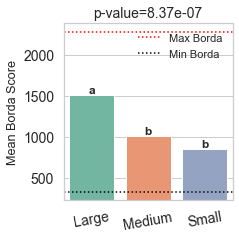

model_type
2281.0


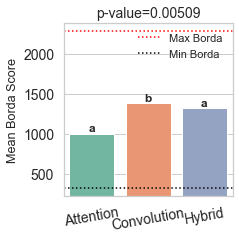

loss_function
2281.0


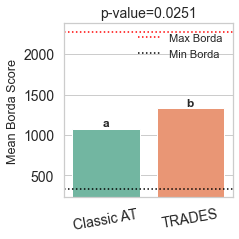

pre_training_strategy
2281.0


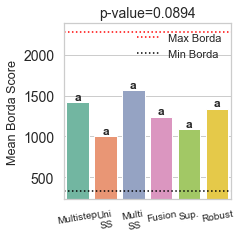

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from statsmodels.stats.multicomp import MultiComparison
import inspect
import matplotlib as mpl

CB_PALETTE = mpl.colormaps['Set2'].colors       # 10 colour-blind-safe hues
sns.set_palette(CB_PALETTE)       # becomes the default for all subsequent plots


# Load the dataset again after reset
# df = pd.read_csv("/mnt/data/fft50_anova.csv")

process= grouped_df[ ('TOTAL', )].reset_index()

# Helper functions
xtick_label_map = {
    "large": "Large",
    "medium": "Medium",
    "small": "Small",
    "hybrid": "Hybrid",
    "fusion": "Fusion",
    "self-supervised": "Uni\nSS",
    "self-supervised (multimodal)": "Multi\nSS",
    "supervised": "Sup.",
    "supervised (robust)": "Robust",
    "supervised (multistep)": "Multistep",
    "fully attention": "Attention",
    "fully convolutional": "Convolution",
    "CLASSIC_AT": "Classic AT",
    "TRADES_v2": "TRADES",
}

def anova_stars(p):
    return '***' if p < 1e-3 else '**' if p < 1e-2 else '*' if p < .05 else '†' if p < .1 else ''

def get_tukey_letters(df, group_col, value_col, alpha=0.05):
    mc   = MultiComparison(df[value_col], df[group_col])
    res  = mc.tukeyhsd(alpha=alpha)
    comp = pd.DataFrame(res.summary().data[1:], columns=res.summary().data[0])
    comp['reject'] = comp['reject'].astype(bool)

    groups   = list(mc.groupsunique)
    letters  = {g: '' for g in groups}
    remaining = set(groups)
    current   = 'a'

    while remaining:
        anchor  = sorted(remaining)[0]
        cluster = {anchor}
        for g in sorted(remaining):
            sig = comp.loc[
                ((comp.group1 == g) & (comp.group2.isin(cluster))) |
                ((comp.group2 == g) & (comp.group1.isin(cluster))), 'reject'
            ].any()
            if not sig:
                cluster.add(g)
        for g in cluster:
            letters[g] += current
        remaining -= cluster
        current = chr(ord(current) + 1)
    return letters

# Compute Welch's ANOVA p-values
welch_pvals = {}
for factor in ['model_size', 'model_type', 'loss_function', 'pre_training_strategy']: 
    df_filtered = process[[factor, 'borda']].dropna()
    groups = [group['borda'].values for name, group in df_filtered.groupby(factor)]
    _, pval = stats.f_oneway(*groups)
    welch_pvals[factor] = pval

# Plot configuration
sns.set(style="whitegrid", font_scale=1.05)
save_dir = "paper_figures"
os.makedirs(save_dir, exist_ok=True)
single_figsize = (3.2, 3.2)

titles = {
    'model_size': 'Model Size',
    'model_type': 'Model Type',
    'loss_function': 'Loss Function',
    'pre_training_strategy': 'Pre-training Strategy'
}

for factor in titles:
    print(factor)

    if factor == "pre_training_strategy":
        order = [
            "supervised (multistep)",
            "self-supervised",
            "self-supervised (multimodal)",
            "fusion",
            "supervised",
            "supervised (robust)",
        ]
    else:
        order = sorted(process[factor].dropna().unique())
    letters = get_tukey_letters(process, factor, 'borda', alpha=0.1)

    fig, ax = plt.subplots(figsize=single_figsize)

    # Define a consistent palette that safely cycles through CB colors
    palette = sns.color_palette(CB_PALETTE, n_colors=len(order))

    kwargs = dict(
        x=factor,
        y='borda',
        data=process,
        order=order,
        estimator=np.mean,
        ci=None,
        ax=ax,
        palette=palette  # <-- integrate color palette here
    )

    if 'errorbar' in inspect.signature(sns.barplot).parameters:
        kwargs['errorbar'] = None

    sns.barplot(**kwargs)

    # Add horizontal dotted line at max Borda score
    max_borda = max(process.borda)
    print(max_borda)
    ax.axhline(max_borda, color='red', linestyle=':', linewidth=1.5, label="Max Borda")
    min_borda = min(process.borda)
    ax.axhline(min_borda, color='black', linestyle=':', linewidth=1.5, label="Min Borda")
    
    ax.legend(loc='upper right', frameon=False, fontsize=11)

    ax.set_ylabel("Mean Borda Score")
    ax.set_xlabel("")

    ax.tick_params(axis='x', rotation=10)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_ylim(min_borda-100, max_borda+100)


    if set(order).issubset(xtick_label_map.keys()):
        ax.set_xticklabels([xtick_label_map[l] for l in order], )

    if factor == "pre_training_strategy":
        ax.tick_params(axis='x', labelsize=10)

    for bar, lvl in zip(ax.containers[0], order):
        ltr = letters.get(lvl, '')
        if ltr:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.01,
                ltr,
                ha='center',
                va='bottom',
                fontweight='bold',
                fontsize=12,
            )

    # Use Welch's p-value
    p = welch_pvals[factor]
    ax.set_title(f"p-value={p:.3g}", fontsize=14)

    fname = f"{save_dir}/main_effect_{factor}.png"
    plt.tight_layout(pad=0.2)
    plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()


In [18]:
from process_database import process_grouped_df, process_rankings, compute_odds_ratio_by_group

grouped_df = process_grouped_df(final_data, size="small")
grouped_df = process_rankings(grouped_df)
grouped_df.to_csv("./perdataset_perf.csv")

Percentage of NaN values: 0.21%
